In [1]:
# support vector machine

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

## Kernel: Replace the dot product of data points, np.dot(X.T,X), with another function so that it is equivalent to projecting the data points to a higher dimension space (through nonliner transformation). In such way, we can deal with nonlinear problem.

In [2]:
import scipy.io as spio

In [3]:
mat = spio.loadmat('sonia_output.mat',squeeze_me = True)

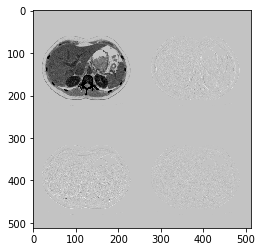

In [4]:
WL = mat['MW']
plt.imshow(WL,cmap=plt.cm.gray_r)

In [5]:
len(WL)

512

In [6]:
len(WL[:,1])

512

In [7]:
#from PIL import Image

In [8]:

#for idxJ in range( len(WL[70])):
#    print(WL[370][idxJ])
#print()
print( WL.shape)

(512L, 512L)


In [9]:
matMask = spio.loadmat('sonia_output_mask.mat', squeeze_me = True)

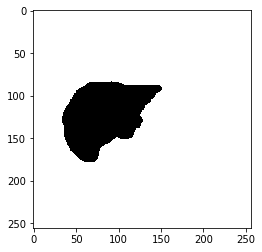

In [10]:
WL_mask = matMask['MW_mask']
plt.imshow(WL_mask,cmap=plt.cm.gray_r)

In [11]:
len(WL_mask)

256

In [12]:
print (WL_mask.shape)

(256L, 256L)


In [13]:
w,h = 4, 256*256
dataWL = np.empty([h,w])

In [14]:
# get the data matrix
idx = 0
for r in range(256):
    for c in range(256):
        dataWL[idx][0] = WL[r][c] #original
        dataWL[idx][1] = WL[r][c+256]# top right
        dataWL[idx][2] = WL[r+256][c]# bottom left
        dataWL[idx][3] = WL[r+256][c+256]# bottom right
        idx += 1


In [15]:
# check data in dataWL
#dataWL[len(dataWL)/2][0]
#for idxI in range(len(dataWL)):
#    print(dataWL[idxI][2])
print( dataWL.shape)

(65536L, 4L)


In [16]:
# get the label matrix
w,h = 1, 256*256
labelWL = np.empty([h,w])
idx = 0
for r in range(256):
    for c in range(256):
        labelWL[idx][0] = WL_mask[r][c] #original
        idx += 1


In [17]:
# check data in labelWL
#dataWL[len(dataWL)/2][0]
#for idxI in range(len(labelWL)):
#    print(labelWL[idxI][0])
print(labelWL.shape)

(65536L, 1L)


In [24]:
# training and prediction

n_samplesWL = len(dataWL)
#data = digits.images.reshape((n_samples, -1))
print n_samplesWL
print dataWL[:2]
print len(dataWL[:,1])
print len(dataWL[1,:])

65536
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
65536
4


In [27]:
# check data row - 0
maxVal = 0.0
for idxI in range(len(dataWL)):
    #print(dataWL[idxI][0])
    maxVal = max( maxVal,dataWL[idxI][0] )

print maxVal

2.0


In [28]:
# check data row - 1
maxVal = 0.0
for idxI in range(len(dataWL)):
    #print(dataWL[idxI][0])
    maxVal = max( maxVal,dataWL[idxI][1] )

print maxVal

0.576470588235


In [29]:
# check data row - 2
maxVal = 0.0
for idxI in range(len(dataWL)):
    #print(dataWL[idxI][0])
    maxVal = max( maxVal,dataWL[idxI][2] )

print maxVal

1.0


In [30]:
# check data row - 3
maxVal = 0.0
for idxI in range(len(dataWL)):
    #print(dataWL[idxI][0])
    maxVal = max( maxVal,dataWL[idxI][2] )

print maxVal

1.0


In [31]:
X_wl = dataWL
#A[:,1] *= 5.2
X_wl[:,0] /= 2.0
X_wl[:,1] *= 2.0



In [ ]:
# check target value


In [32]:
maxVal = 0.0
for idxI in range(len(labelWL)):
    #print(dataWL[idxI][0])
    maxVal = max( maxVal,labelWL[idxI][0] )

print maxVal

255.0


In [33]:
Y_wl = labelWL[:,0]
Y_wl /= 255
maxVal = 0.0
for idxI in range(len(Y_wl)):
    #print(dataWL[idxI][0])
    maxVal = max( maxVal,Y_wl[idxI])

print maxVal

1.0


In [34]:
print(Y_wl.shape)

(65536L,)


In [35]:
# start cross validation
from sklearn.model_selection import GridSearchCV
# cross-validation, find the best classifier
Cs = np.logspace(-6, -1, 10)
kernels = ["linear","rbf","poly"]
degrees = [2,3,4]
gammas = [0.001,0.01,0.1,1,2,5]
modelCV = GridSearchCV(estimator=svm.SVC(), 
                   param_grid=dict(C=Cs,kernel=kernels,degree=degrees, 
                                   gamma=gammas),n_jobs=-1)
modelCV.fit(X_wl[:n_samplesWL // 2], Y_wl[:n_samplesWL // 2]) #use half the data for training

classifier = modelCV.best_estimator_
print(classifier)


SVC(C=0.10000000000000001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [36]:
# Now predict the value of the digit on the second half:
# for test
expected = Y_wl[n_samplesWL // 2:]
predicted = classifier.predict(X_wl[n_samplesWL // 2:])

print("Classification report %s\n" % (metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))



Classification report              precision    recall  f1-score   support

        0.0       0.98      0.85      0.91     29821
        1.0       0.35      0.82      0.49      2947

avg / total       0.92      0.85      0.87     32768


Confusion matrix:
[[25383  4438]
 [  544  2403]]


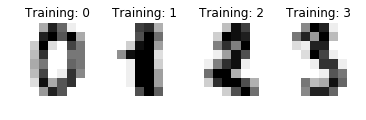

In [18]:
# Using SVM to do image recognition
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

In [19]:
# training and prediction

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print n_samples
print data[:2]
print len(data[:,1])
print len(data[1,:])

1797
[[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.
    5.   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.
    0.   8.   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.
   11.   0.   1.  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.
    0.   0.   6.  13.  10.   0.   0.   0.]
 [  0.   0.   0.  12.  13.   5.   0.   0.   0.   0.   0.  11.  16.   9.
    0.   0.   0.   0.   3.  15.  16.   6.   0.   0.   0.   7.  15.  16.
   16.   2.   0.   0.   0.   0.   1.  16.  16.   3.   0.   0.   0.   0.
    1.  16.  16.   6.   0.   0.   0.   0.   1.  16.  16.   6.   0.   0.
    0.   0.   0.  11.  16.  10.   0.   0.]]
1797
64


In [20]:
print(digits.images.shape)


(1797L, 8L, 8L)


In [21]:
print( data.shape)

(1797L, 64L)


In [22]:
X = data/16.
Y = digits.target

In [23]:
print(Y.shape)

(1797L,)


In [9]:
from sklearn.model_selection import GridSearchCV
# cross-validation, find the best classifier
Cs = np.logspace(-6, -1, 10)
kernels = ["linear","rbf","poly"]
degrees = [2,3,4]
gammas = [0.001,0.01,0.1,1,2,5]
modelCV = GridSearchCV(estimator=svm.SVC(), 
                   param_grid=dict(C=Cs,kernel=kernels,degree=degrees, 
                                   gamma=gammas),n_jobs=-1)
modelCV.fit(X[:n_samples // 2], Y[:n_samples // 2]) #use half the data for training

classifier = modelCV.best_estimator_
print(classifier)


SVC(C=0.0077426368268112772, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=2, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Classification report              precision    recall  f1-score   support

          0       0.97      0.99      0.98        88
          1       0.99      0.93      0.96        91
          2       1.00      0.98      0.99        86
          3       0.96      0.90      0.93        91
          4       0.98      0.96      0.97        92
          5       0.92      0.97      0.94        91
          6       0.99      0.99      0.99        91
          7       0.97      0.98      0.97        89
          8       0.93      0.95      0.94        88
          9       0.89      0.93      0.91        92

avg / total       0.96      0.96      0.96       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 85  0  0  0  0  0  0  1  5]
 [ 1  0 84  1  0  0  0  0  0  0]
 [ 0  0  0 82  0  3  0  1  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  2  0 87  0  0]
 [ 0  0  0  1  1  1  0  1 84  0]
 [ 2  0  0  1  0  2  0 

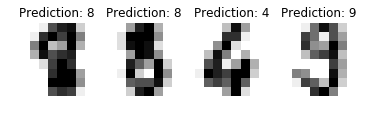

In [10]:
# Now predict the value of the digit on the second half:
# for test
expected = Y[n_samples // 2:]
predicted = classifier.predict(X[n_samples // 2:])

print("Classification report %s\n" % (metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()